In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import pearsonr
from scipy.stats import linregress

Datos tomdados de:

PROYECCIÓN DE LA DEMANDA DE ENERGÍA ELÉCTRICA Y POTENCIA MÁXIMA 2023-2037, UPME
(https://www1.upme.gov.co/DemandayEficiencia/Documents/UPME_Proyeccion_demanda_2023-2037_VF2.pdf)

In [34]:
df = pd.read_csv('consumo_electrico_upme.csv')

In [35]:
df.head()

,year,gwhYear
0,2023,76.740
1,2024,78.396
2,2025,79.982
3,2026,81.305
4,2027,83.211


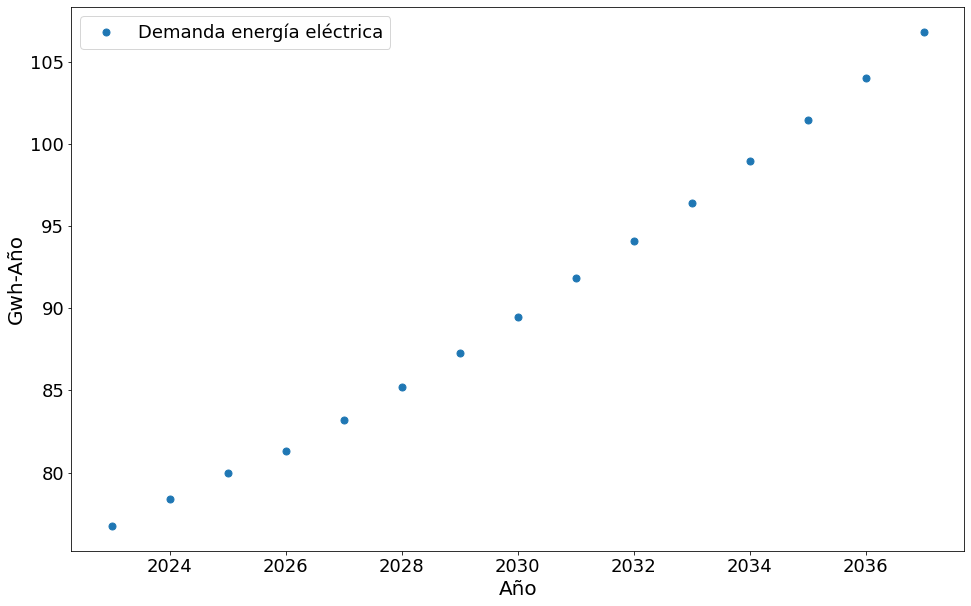

In [159]:
plt.figure(figsize=(16, 10))

plt.plot(df.year, df.gwhYear, ".", markersize=14, label='Demanda energía eléctrica')

plt.ylabel('Gwh-Año', fontsize=20)
plt.xlabel('Año', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc='upper left', fontsize=18)

plt.show()

Calculation Pearson's coefficient

In [160]:
pearson_coefficient, _ = pearsonr(df.year, df.gwhYear)
pearson_coefficientimport scºipy

0.9962735543671528

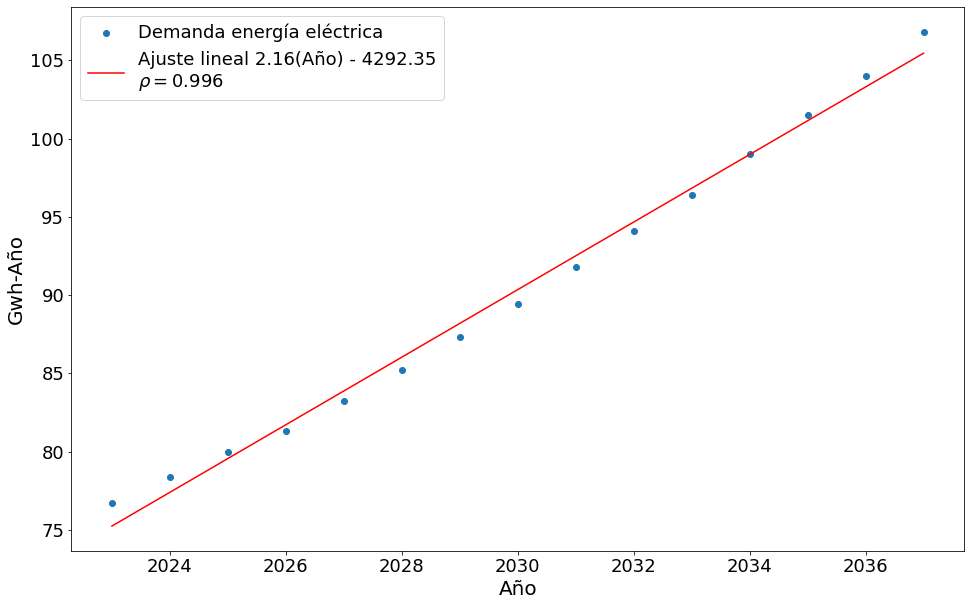

In [179]:
plt.figure(figsize=(16, 10))

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(df.year, df.gwhYear)

# Calculate the predicted values using the linear equation
predicted_y = slope * df.year + intercept

# Plot the original data and the fitted line

txt = 'Ajuste lineal %.2f'%slope + '(Año)' + ' - %.2f'%(-1.*intercept) + '\n'
txt += r'$\rho = $%.3f'%pearson_coefficient
#f'Ajuste lineal: ({slope:.2f})Año - {:.2f}'
plt.scatter(df.year, df.gwhYear, label='Demanda energía eléctrica')
plt.plot(df.year, predicted_y, color='red', label=txt)

plt.ylabel('Gwh-Año', fontsize=20)
plt.xlabel('Año', fontsize=20)
plt.xticks(fontsize# Plot the data
=18)
plt.yticks(fontsize=18)
plt.legend(loc='upper left', fontsize=18)

plt.show()

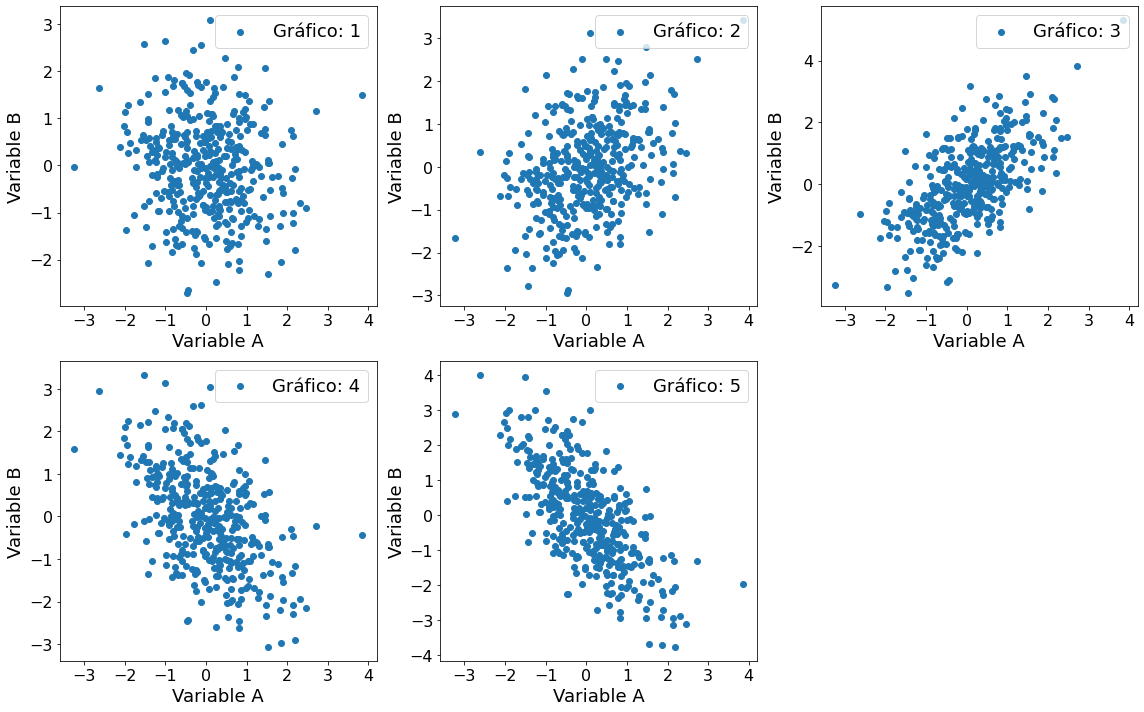

In [22]:
r = [0. , 0.5, 0.99, -0.5, -0.9]
nPoints = 400

# Generate random data with specified correlation coefficients
plt.figure(figsize=(16, 10))
for i in range(len(r)):
  np.random.seed(42)
  x = np.random.normal(0, 1, nPoints)
  y = r[i] * x + np.random.normal(0, 1, nPoints)
  
  plt.subplot(2, 3, i+1)
  plt.scatter(x, y, label=f'Gráfico: {i + 1}')
  
  plt.xlabel('Variable A', fontsize=18)
  plt.ylabel('Variable B', fontsize=18)
  plt.legend(fontsize=18, loc='upper right')
  plt.xticks(fontsize=16)
  plt.yticks(fontsize=16)

plt.tight_layout()
plt.show()ipy

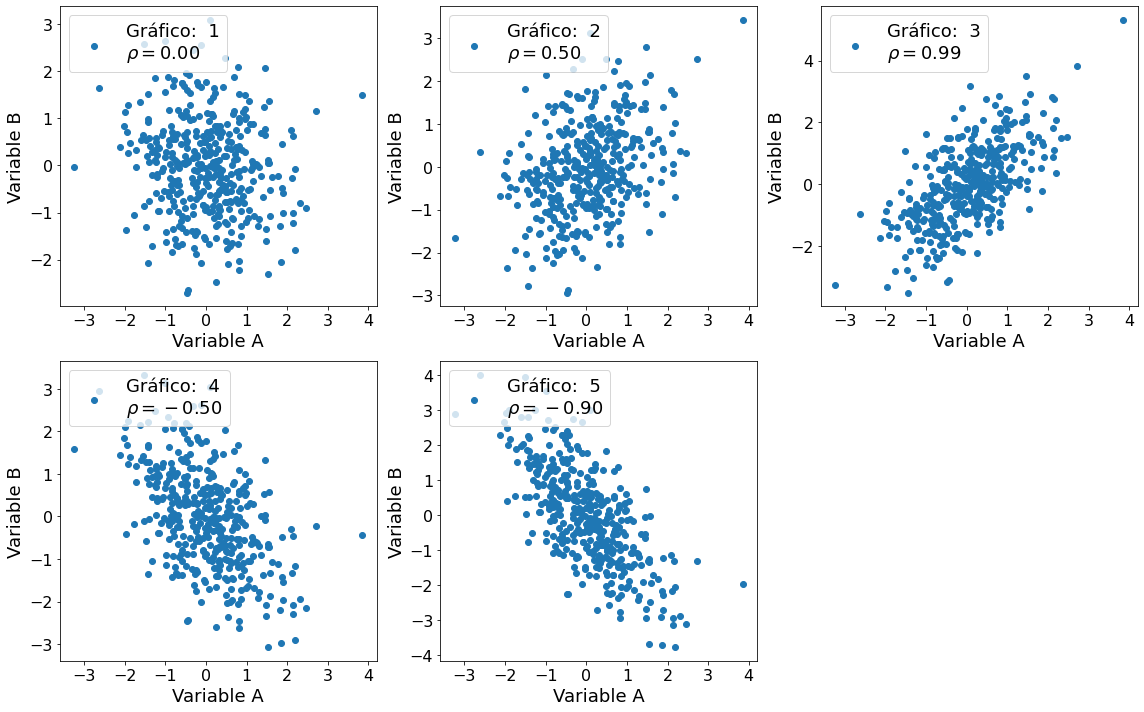

In [23]:
r = [0. , 0.5, 0.99, -0.5, -0.9]
nPoints = 400

# Generate random data with specified correlation coefficients
plt.figure(figsize=(16, 10))
for i in range(len(r)):
  np.random.seed(42)
  x = np.random.normal(0, 1, nPoints)
  y = r[i] * x + np.random.normal(0, 1, nPoints)
  
  plt.subplot(2, 3, i+1)
  txt = "Gráfico: %2d"%(i+1)+"\n"+r"$\rho = %.2f$"%r[i]ipy
  plt.scatter(x, y, label=txt)
  
  plt.xlabel('Variable A', fontsize=18)
  plt.ylabel('Variable B', fontsize=18)
  plt.legend(fontsize=18, loc='upper left')
  plt.xticks(fontsize=16)
  plt.yticks(fontsize=16)
# Plot the data

plt.tight_layout()
plt.show()

## Coeficiente de correlación 0.99 y función exponencial

In [61]:
x = np.linspace(0, 3, 100)
y = np.exp(x) + np.random.normal(0, 1, 100)

In [62]:
def exponential_function(x, a, b):
  return a * np.exp(b * x)

In [63]:
a, b = 1, 1

# Perform the curve fit
params, covariance = curve_fit(exponential_function, x, y, p0=(a, b))

y_fitted = exponential_function(x, *params)

In [64]:
# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Calculate the predicted values using the linear equation
y_linear = slope * x + intercept

In [57]:
pearson_coefficient, _ = pearsonr(x, y)
pearson_coefficient

0.9135392185773177

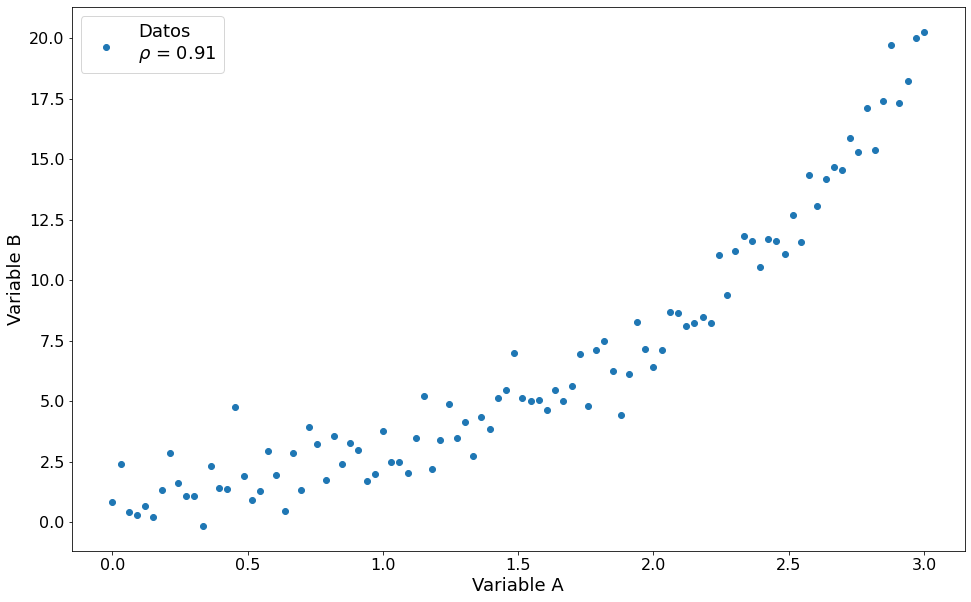

In [82]:
corr_coef = np.corrcoef(x, y)[0, 1]

plt.figure(figsize=(16, 10))

plt.scatter(x, y, label='Datos\n' + r'$\rho$ = %.2f'%pearson_coefficient)

plt.xlabel('Variable A', fontsize=18)
plt.ylabel('Variable B', fontsize=18)

plt.legend(fontsize=18, loc='upper left')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()

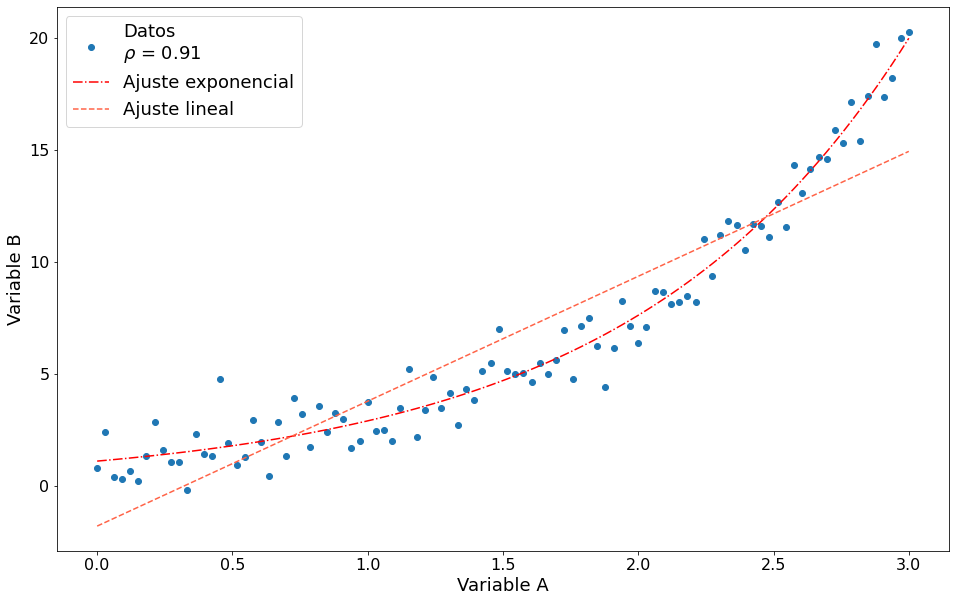

In [90]:
corr_coef = np.corrcoef(x, y)[0, 1]

plt.figure(figsize=(16, 10))

plt.scatter(x, y, label='Datos\n' + r'$\rho$ = %.2f'%pearson_coefficient)
plt.plot(x, y_fitted, label='Ajuste exponencial', linestyle='-.', color='r')
plt.plot(x, y_linear, label='Ajuste lineal', linestyle='--', color='tomato')

plt.xlabel('Variable A', fontsize=18)
plt.ylabel('Variable B', fontsize=18)


plt.legend(fontsize=18, loc='upper left')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()